In [1]:
import json
import matplotlib.pyplot as plt

In [3]:
ds = json.loads(open('./eval_final2_01012024_complete_hist.json', 'r').read())
ds_tiage = json.loads(open('./eval_final2_01012024_complete_tiage.json', 'r').read())
ds_multiwoz = json.loads(open('./eval_final2_01022024_complete_multiwoz.json').read())

accumulative turn scores

In [3]:
print(ds.keys())
with open('./eval_final2_01012024_complete_hist.json', 'w') as fp:
    json.dump(ds, fp)

dict_keys(['t_d004c097-424d-45d4-8f91-833d85c2da31', 't_04eea955-7ad7-4c3c-aa0b-0fc16e89ae1d', 't_f6789857-c30c-423a-bdf5-d6207dc7db9d', 't_c0f787a2-1a4a-47c3-95aa-50b5567504e8', 't_5653dfe8-69f5-4285-a32c-cb1bd01f40b4', 't_c41223cb-1b3d-4a2e-9a3f-1ad884b4a073', 't_551f37f7-aea2-402b-a97e-1d1000e0d7af', 't_3394e60b-87f0-489b-a2ae-861785b9017d', 't_51d376af-dd7d-4388-a2f8-c838f92e6145', 't_f11b25b0-d512-4784-a33b-bb3a34d6b63f', 't_45f6f254-c795-4a81-adc5-a5c8fdd83599', 't_f5297c3e-d4fc-425e-a3f9-f3a231464d1d', 't_369cf3a0-bb67-4304-8a69-ce81a72d4667', 't_58b5262d-22ab-4dc8-a0ff-96316174b53d', 't_cfd71db7-9e8c-423c-aa79-c71873591b2f', 't_93dc1804-5f5e-42d8-8fe2-c9acb3970219', 't_bf7ce8ac-8681-47a1-9421-114df4038e7d', 't_f0e894ec-d2ca-4f3c-94cf-750389cb7a48', 't_ef78fec3-5245-49cd-a97f-d3553d1c0205', 't_cd147f3e-6c00-4497-95fe-a180f7ddd8ac', 't_9ef31f1d-1f5c-4d2c-ac58-714eaf03153e', 't_bfa66d9e-5607-4d07-b00d-9a087626ca3d', 't_90f798db-a196-442a-9e1f-4adc68c0110a', 't_d58d3a06-d84f-4c0a-9

In [4]:
o_sum = [0,0,0,0,0,0]
o_sum_bleu = 0
o_sum_rouge = [0,0,0,0]

b1_sum = [0,0,0,0,0,0]
b1_sum_bleu = 0
b1_sum_rouge = [0,0,0,0]

b2_sum = [0,0,0,0,0,0]
b2_sum_bleu = 0
b2_sum_rouge = [0,0,0,0]

tot_num = 0
for inst in ds:
    for i in ds[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        #print(ours['unieval'])
        o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
        o_sum_bleu += ours['bleu']
        o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

        b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
        b1_sum_bleu += b1['bleu']

        b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
        b2_sum_bleu += b2['bleu']
        tot_num += 1

# print scores when they are all together
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
print('ours: ', [o/tot_num for o in o_sum])
print('ours bleu: ', o_sum_bleu/tot_num)
print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
print()
print('b1: ', [b/tot_num for b in b1_sum])
print('b1 bleu: ', b1_sum_bleu/tot_num)
print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
print()
print('b2: ', [b/tot_num for b in b2_sum])
print('b2 bleu: ', b2_sum_bleu/tot_num)
print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
print()
print(tot_num)

naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.8938200908542359, 0.6173675743210978, 2.333191849075426, 0.623588730790836, 0.8817692319935001, 1.0699474954070176]
ours bleu:  0.09926847041031386
ours rouge:  [0.1690549175341991, 0.018312034507203527, 0.1323667333524589, 0.13241496144323125]

b1:  [0.9175678367458986, 0.5991926627770133, 1.8607636892981374, 0.41345555192450945, 0.9049087552068376, 0.9391776991904784]
b1 bleu:  0.1342685093604766
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.9992926980526273, 0.4650155951887428, 0.7399541446973656, 0.5754438989348726, 0.9993360003704669, 0.7558084674488148]
b2 bleu:  0.18094511592397755
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

1037


# Topical Chat

## Conversation History Length Evaluation (Topical Chat)

In [10]:
NUM_TURNS = 35
collection = []
for NTI in range(NUM_TURNS):
    try:
        o_sum = [0,0,0,0,0,0]
        o_sum_bleu = 0
        o_sum_rouge = [0,0,0,0]

        b1_sum = [0,0,0,0,0,0]
        b1_sum_bleu = 0
        b1_sum_rouge = [0,0,0,0]

        b2_sum = [0,0,0,0,0,0]
        b2_sum_bleu = 0
        b2_sum_rouge = [0,0,0,0]

        tot_num = 0
        for inst in ds:
            for i in ds[inst]:
                if i['user_in'].count('person1') + i['user_in'].count('person2') == NTI:
                    ours = i['ours']
                    b1 = i['b1(vanilla)']
                    b2 = i['b2(ott)']
                    #print(ours['unieval'])
                    o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
                    o_sum_bleu += ours['bleu']
                    o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

                    b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
                    b1_sum_bleu += b1['bleu']

                    b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
                    b2_sum_bleu += b2['bleu']
                    tot_num += 1

        # print scores when they are all together
        print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
        print('ours: ', [o/tot_num for o in o_sum])
        print('ours bleu: ', o_sum_bleu/tot_num)
        print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
        print()
        print('b1: ', [b/tot_num for b in b1_sum])
        print('b1 bleu: ', b1_sum_bleu/tot_num)
        print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
        print()
        print('b2: ', [b/tot_num for b in b2_sum])
        print('b2 bleu: ', b2_sum_bleu/tot_num)
        print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
        print()
        print(tot_num)
        collection.append([NTI, [o/tot_num for o in o_sum], [b/tot_num for b in b1_sum], [b/tot_num for b in b2_sum], tot_num])
    except:
        continue

naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.9036228947709087, 0.692180430540497, 2.8114442299653284, 0.7335114022696243, 0.8885677034834666, 1.2058653322059651]
ours bleu:  0.07259519630753276
ours rouge:  [0.18548261440325844, 0.021344470407150977, 0.15432789055064408, 0.15432789055064408]

b1:  [0.9310364688188091, 0.7114839887093022, 2.4092755405903126, 0.5871272873047341, 0.9180133839648561, 1.1113873338776024]
b1 bleu:  0.11945616541119565
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.999726389670038, 0.660690000468774, 0.9006961603228592, 0.5354238115103398, 0.9996860644268685, 0.8192444852797761]
b2 bleu:  0.22649998661581264
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

99
naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.8989950930462063, 0.7523503150155281

In [11]:
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
for c in collection:
    print(c)

naturalness, coherence, engagingness, groundedness, understandibility, overall
[1, [0.9036228947709087, 0.692180430540497, 2.8114442299653284, 0.7335114022696243, 0.8885677034834666, 1.2058653322059651], [0.9310364688188091, 0.7114839887093022, 2.4092755405903126, 0.5871272873047341, 0.9180133839648561, 1.1113873338776024], [0.999726389670038, 0.660690000468774, 0.9006961603228592, 0.5354238115103398, 0.9996860644268685, 0.8192444852797761], 99]
[3, [0.8989950930462063, 0.7523503150155281, 2.663094997509061, 0.7517079770419045, 0.8866618984811284, 1.1905620562187653], [0.9243234307297638, 0.7457700931280965, 2.4959945888973887, 0.5857073382909127, 0.9115214000503798, 1.1326633702193085], [0.9997341066610356, 0.5595933382635281, 0.80337420669184, 0.5302551243670383, 0.9996919508294719, 0.7785297453625831], 99]
[5, [0.8946852919435513, 0.5738739114535362, 2.1779096627218038, 0.6399197419249006, 0.8822901633915277, 1.0337357542870649], [0.9236017634580149, 0.6070001817164892, 1.9840370068

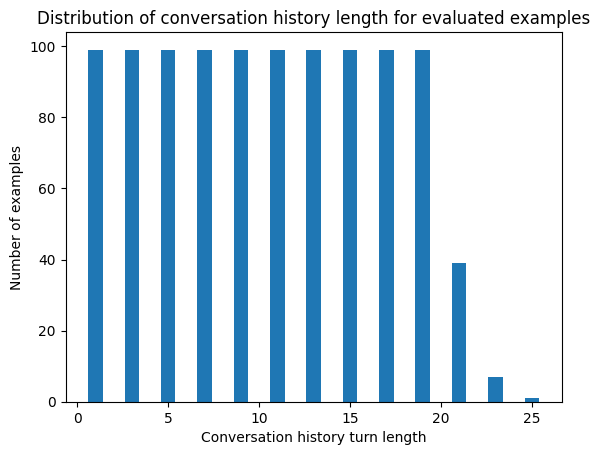

In [16]:
x = [xx[0] for xx in collection]
y = [yy[-1] for yy in collection]
plt.bar(x,y)
plt.title('Distribution of conversation history length for evaluated examples')
plt.xlabel('Conversation history turn length')
plt.ylabel('Number of examples')
plt.show()

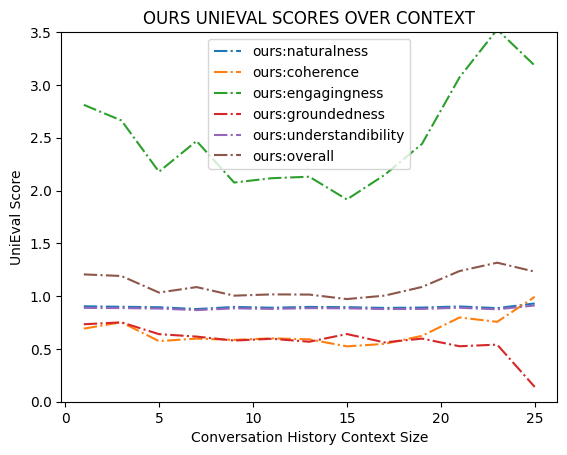

In [12]:
plt.plot([c[0] for c in collection], [c[1][0] for c in collection], '-.', label='ours:naturalness')
plt.plot([c[0] for c in collection], [c[1][1] for c in collection], '-.', label='ours:coherence')
plt.plot([c[0] for c in collection], [c[1][2] for c in collection], '-.', label='ours:engagingness')
plt.plot([c[0] for c in collection], [c[1][3] for c in collection], '-.', label='ours:groundedness')
plt.plot([c[0] for c in collection], [c[1][4] for c in collection], '-.', label='ours:understandibility')
plt.plot([c[0] for c in collection], [c[1][5] for c in collection], '-.', label='ours:overall')
plt.title('OURS UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

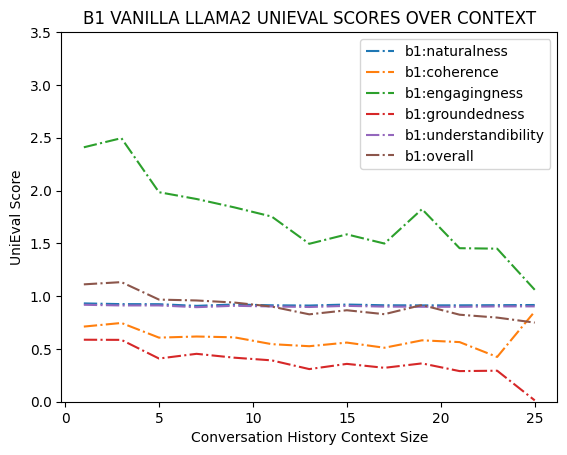

In [13]:
plt.plot([c[0] for c in collection], [c[2][0] for c in collection], '-.', label='b1:naturalness')
plt.plot([c[0] for c in collection], [c[2][1] for c in collection], '-.', label='b1:coherence')
plt.plot([c[0] for c in collection], [c[2][2] for c in collection], '-.', label='b1:engagingness')
plt.plot([c[0] for c in collection], [c[2][3] for c in collection], '-.', label='b1:groundedness')
plt.plot([c[0] for c in collection], [c[2][4] for c in collection], '-.', label='b1:understandibility')
plt.plot([c[0] for c in collection], [c[2][5] for c in collection], '-.', label='b1:overall')
plt.title('B1 VANILLA LLAMA2 UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

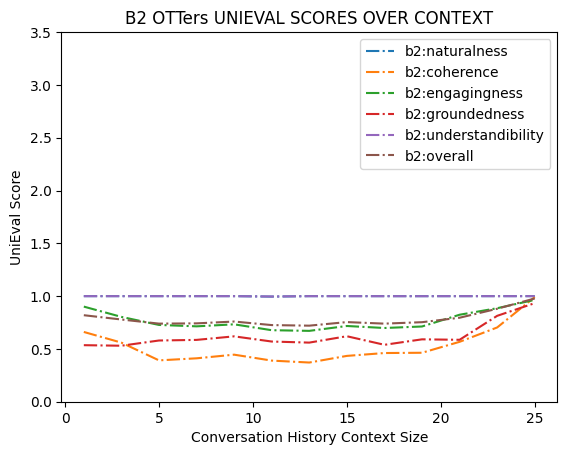

In [14]:
plt.plot([c[0] for c in collection], [c[3][0] for c in collection], '-.', label='b2:naturalness')
plt.plot([c[0] for c in collection], [c[3][1] for c in collection], '-.', label='b2:coherence')
plt.plot([c[0] for c in collection], [c[3][2] for c in collection], '-.', label='b2:engagingness')
plt.plot([c[0] for c in collection], [c[3][3] for c in collection], '-.', label='b2:groundedness')
plt.plot([c[0] for c in collection], [c[3][4] for c in collection], '-.', label='b2:understandibility')
plt.plot([c[0] for c in collection], [c[3][5] for c in collection], '-.', label='b2:overall')
plt.title('B2 OTTers UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

## Question Asking Evaluation

In [24]:
questions_as_response_ours = []
questions_as_response_b1 = []
questions_as_response_b2 = []
total_instances = 0
for inst in ds:
    for i in ds[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        total_instances += 1
        if '?' in ours['generated']:
            questions_as_response_ours.append(i)
        if '?' in b1['generated']:
            questions_as_response_b1.append(i)
        if '?' in b2['generated']:
            questions_as_response_b2.append(i)


In [25]:
print(f'Ours: {len(questions_as_response_ours)}/{total_instances}')
print(f'B1: {len(questions_as_response_b1)}/{total_instances}')
print(f'B2: {len(questions_as_response_b2)}/{total_instances}')

Ours: 607/1037
B1: 167/1037
B2: 1/1037


# TIAGE

## CHLE (TIAGE)

In [35]:
NUM_TURNS = 35
collection = []
for NTI in range(NUM_TURNS):
    try:
        o_sum = [0,0,0,0,0,0]
        o_sum_bleu = 0
        o_sum_rouge = [0,0,0,0]

        b1_sum = [0,0,0,0,0,0]
        b1_sum_bleu = 0
        b1_sum_rouge = [0,0,0,0]

        b2_sum = [0,0,0,0,0,0]
        b2_sum_bleu = 0
        b2_sum_rouge = [0,0,0,0]

        tot_num = 0
        for inst in ds_tiage:
            for i in ds_tiage[inst]:
                if i['user_in'].count('person1') + i['user_in'].count('person2') == NTI:
                    ours = i['ours']
                    b1 = i['b1(vanilla)']
                    b2 = i['b2(ott)']
                    #print(ours['unieval'])
                    o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
                    o_sum_bleu += ours['bleu']
                    o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

                    b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
                    b1_sum_bleu += b1['bleu']

                    b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
                    b2_sum_bleu += b2['bleu']
                    tot_num += 1

        # print scores when they are all together
        print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
        print('ours: ', [o/tot_num for o in o_sum])
        print('ours bleu: ', o_sum_bleu/tot_num)
        print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
        print()
        print('b1: ', [b/tot_num for b in b1_sum])
        print('b1 bleu: ', b1_sum_bleu/tot_num)
        print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
        print()
        print('b2: ', [b/tot_num for b in b2_sum])
        print('b2 bleu: ', b2_sum_bleu/tot_num)
        print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
        print()
        print(tot_num)
        collection.append([NTI, [o/tot_num for o in o_sum], [b/tot_num for b in b1_sum], [b/tot_num for b in b2_sum], tot_num])
    except:
        continue

naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.9036538571637853, 0.7071018988743683, 2.535674814517972, 0.6475655008895447, 0.8917713759222714, 1.1371534894735884]
ours bleu:  0.028384904957684354
ours rouge:  [0.14423067040800094, 0.008998565143933423, 0.13219460694160629, 0.13219460694160629]

b1:  [0.9333118788554315, 0.7201363900416733, 2.7473702412216703, 0.6285295187342701, 0.9211454545370582, 1.1900986966780203]
b1 bleu:  0.09835207939196425
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.999639681513993, 0.6601323268606051, 0.9478724694452252, 0.757645098397899, 0.999563762528683, 0.8729706677492807]
b2 bleu:  0.25359745881565626
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

99
naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.9026138202146052, 0.592991714526557,

In [36]:
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
for c in collection:
    print(c)

naturalness, coherence, engagingness, groundedness, understandibility, overall
[1, [0.9036538571637853, 0.7071018988743683, 2.535674814517972, 0.6475655008895447, 0.8917713759222714, 1.1371534894735884], [0.9333118788554315, 0.7201363900416733, 2.7473702412216703, 0.6285295187342701, 0.9211454545370582, 1.1900986966780203], [0.999639681513993, 0.6601323268606051, 0.9478724694452252, 0.757645098397899, 0.999563762528683, 0.8729706677492807], 99]
[3, [0.9026138202146052, 0.592991714526557, 2.4156748367334484, 0.8224731141161447, 0.8895772160414193, 1.1246661403264355], [0.9223610184164283, 0.5894665616937257, 2.3631056513796445, 0.7861387299943973, 0.908436267259502, 1.11390164574874], [0.9993271814626611, 0.6472478779173882, 0.9378993651623295, 0.6637929886463971, 0.9990125784330177, 0.8494559983243587], 99]
[5, [0.9061242618202943, 0.40243995393805243, 1.8374734505008568, 0.8038450027620653, 0.8925417236582369, 0.9684848785359013], [0.9214680446573541, 0.34481574808823845, 1.6310794208

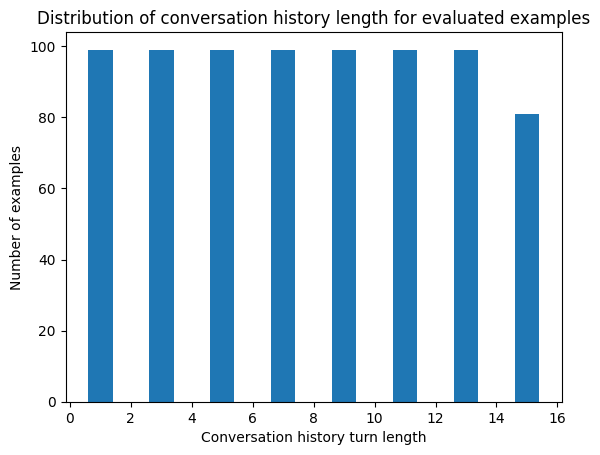

In [37]:
x = [xx[0] for xx in collection]
y = [yy[-1] for yy in collection]
plt.bar(x,y)
plt.title('Distribution of conversation history length for evaluated examples')
plt.xlabel('Conversation history turn length')
plt.ylabel('Number of examples')
plt.show()

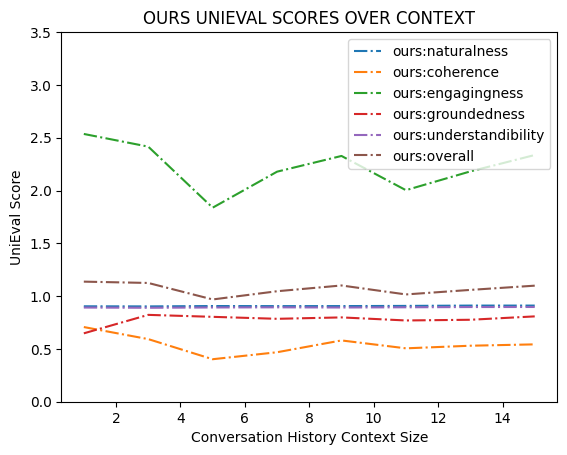

In [38]:
plt.plot([c[0] for c in collection], [c[1][0] for c in collection], '-.', label='ours:naturalness')
plt.plot([c[0] for c in collection], [c[1][1] for c in collection], '-.', label='ours:coherence')
plt.plot([c[0] for c in collection], [c[1][2] for c in collection], '-.', label='ours:engagingness')
plt.plot([c[0] for c in collection], [c[1][3] for c in collection], '-.', label='ours:groundedness')
plt.plot([c[0] for c in collection], [c[1][4] for c in collection], '-.', label='ours:understandibility')
plt.plot([c[0] for c in collection], [c[1][5] for c in collection], '-.', label='ours:overall')
plt.title('OURS UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

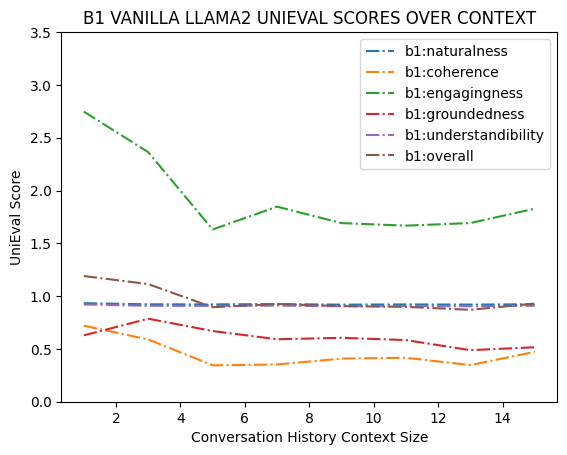

In [39]:
plt.plot([c[0] for c in collection], [c[2][0] for c in collection], '-.', label='b1:naturalness')
plt.plot([c[0] for c in collection], [c[2][1] for c in collection], '-.', label='b1:coherence')
plt.plot([c[0] for c in collection], [c[2][2] for c in collection], '-.', label='b1:engagingness')
plt.plot([c[0] for c in collection], [c[2][3] for c in collection], '-.', label='b1:groundedness')
plt.plot([c[0] for c in collection], [c[2][4] for c in collection], '-.', label='b1:understandibility')
plt.plot([c[0] for c in collection], [c[2][5] for c in collection], '-.', label='b1:overall')
plt.title('B1 VANILLA LLAMA2 UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

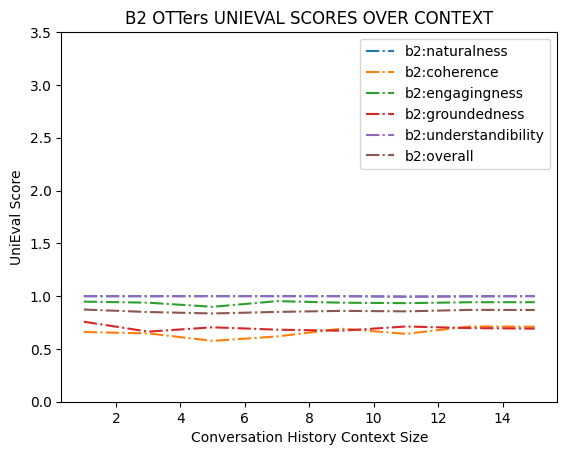

In [40]:
plt.plot([c[0] for c in collection], [c[3][0] for c in collection], '-.', label='b2:naturalness')
plt.plot([c[0] for c in collection], [c[3][1] for c in collection], '-.', label='b2:coherence')
plt.plot([c[0] for c in collection], [c[3][2] for c in collection], '-.', label='b2:engagingness')
plt.plot([c[0] for c in collection], [c[3][3] for c in collection], '-.', label='b2:groundedness')
plt.plot([c[0] for c in collection], [c[3][4] for c in collection], '-.', label='b2:understandibility')
plt.plot([c[0] for c in collection], [c[3][5] for c in collection], '-.', label='b2:overall')
plt.title('B2 OTTers UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

## QAE (TIAGE)

In [41]:
questions_as_response_ours = []
questions_as_response_b1 = []
questions_as_response_b2 = []
total_instances = 0
for inst in ds_tiage:
    for i in ds_tiage[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        total_instances += 1
        if '?' in ours['generated']:
            questions_as_response_ours.append(i)
        if '?' in b1['generated']:
            questions_as_response_b1.append(i)
        if '?' in b2['generated']:
            questions_as_response_b2.append(i)

In [42]:
print(f'Ours: {len(questions_as_response_ours)}/{total_instances}')
print(f'B1: {len(questions_as_response_b1)}/{total_instances}')
print(f'B2: {len(questions_as_response_b2)}/{total_instances}')

Ours: 602/774
B1: 316/774
B2: 2/774


# MULTIWOZ

## CHLE (MULTIWOZ)

In [12]:
NUM_TURNS = 35
collection = []
for NTI in range(NUM_TURNS):
    try:
        o_sum = [0,0,0,0,0,0]
        o_sum_bleu = 0
        o_sum_rouge = [0,0,0,0]

        b1_sum = [0,0,0,0,0,0]
        b1_sum_bleu = 0
        b1_sum_rouge = [0,0,0,0]

        b2_sum = [0,0,0,0,0,0]
        b2_sum_bleu = 0
        b2_sum_rouge = [0,0,0,0]

        tot_num = 0
        for inst in ds_multiwoz:
            for i in ds_multiwoz[inst]:
                if i['user_in'].count('person1') + i['user_in'].count('person2') == NTI:
                    ours = i['ours']
                    b1 = i['b1(vanilla)']
                    b2 = i['b2(ott)']
                    #print(ours['unieval'])
                    o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
                    o_sum_bleu += ours['bleu']
                    o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

                    b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
                    b1_sum_bleu += b1['bleu']

                    b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
                    b2_sum_bleu += b2['bleu']
                    tot_num += 1

        # print scores when they are all together
        print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
        print('ours: ', [o/tot_num for o in o_sum])
        print('ours bleu: ', o_sum_bleu/tot_num)
        print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
        print()
        print('b1: ', [b/tot_num for b in b1_sum])
        print('b1 bleu: ', b1_sum_bleu/tot_num)
        print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
        print()
        print('b2: ', [b/tot_num for b in b2_sum])
        print('b2 bleu: ', b2_sum_bleu/tot_num)
        print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
        print()
        print(tot_num)
        collection.append([NTI, [o/tot_num for o in o_sum], [b/tot_num for b in b1_sum], [b/tot_num for b in b2_sum], tot_num])
    except:
        continue

naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.8975977849141006, 0.8646411839221032, 3.4625586027171127, 0.724282232922235, 0.8856845005151781, 1.3669528609981465]
ours bleu:  0.0848499905470351
ours rouge:  [0.18281149666702437, 0.02606655025465457, 0.1411560588655493, 0.1411560588655493]

b1:  [0.9257339836899432, 0.9308658035000087, 3.045377558248437, 0.7251121243718022, 0.9160134266856195, 1.3086205792991616]
b1 bleu:  0.14143259193477778
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.9998255621647997, 0.6673099951725376, 0.9647488468115417, 0.8381529389101868, 0.9998033738440744, 0.893968143380628]
b2 bleu:  0.1978265297384626
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

95
naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.9030050567239997, 0.804029154787895, 3.31

In [13]:
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
for c in collection:
    print(c)

naturalness, coherence, engagingness, groundedness, understandibility, overall
[1, [0.8975977849141006, 0.8646411839221032, 3.4625586027171127, 0.724282232922235, 0.8856845005151781, 1.3669528609981465], [0.9257339836899432, 0.9308658035000087, 3.045377558248437, 0.7251121243718022, 0.9160134266856195, 1.3086205792991616], [0.9998255621647997, 0.6673099951725376, 0.9647488468115417, 0.8381529389101868, 0.9998033738440744, 0.893968143380628], 95]
[3, [0.9030050567239997, 0.804029154787895, 3.3116472041084193, 0.735495797018243, 0.8939042385998363, 1.329616290247679], [0.9186230092738976, 0.931032287387249, 2.89802320408629, 0.623492753298444, 0.9087701321726278, 1.2559882772437019], [0.9997845252510661, 0.6995079449892997, 0.9599775265453421, 0.7551973090526154, 0.9997461904723034, 0.8828426992621246], 95]
[5, [0.9087109056850372, 0.8659861712869145, 3.363314341202184, 0.7011045929637427, 0.8998169035430139, 1.3477865829361786], [0.9212115332856619, 0.9160586263140651, 2.762507804923604

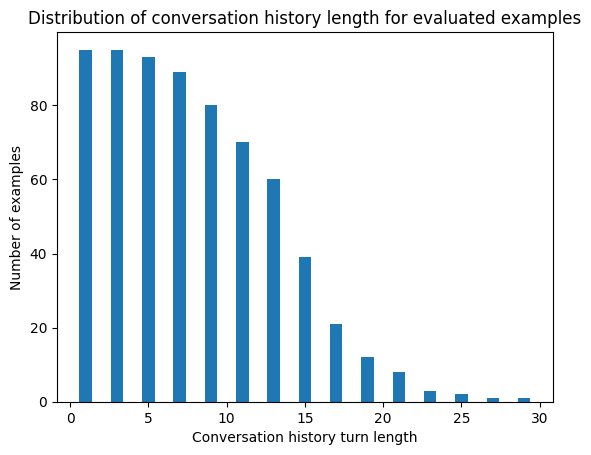

In [14]:
x = [xx[0] for xx in collection]
y = [yy[-1] for yy in collection]
plt.bar(x,y)
plt.title('Distribution of conversation history length for evaluated examples')
plt.xlabel('Conversation history turn length')
plt.ylabel('Number of examples')
plt.show()

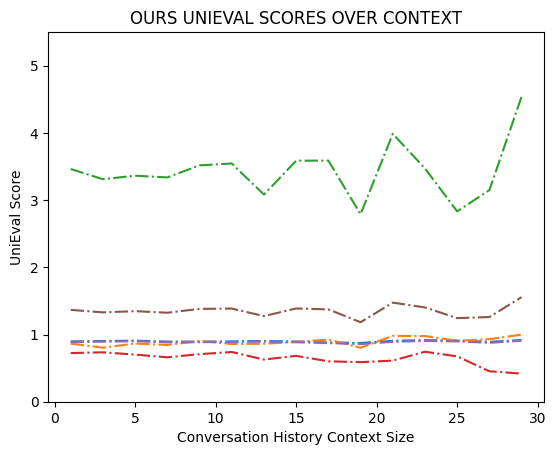

In [27]:
plt.plot([c[0] for c in collection], [c[1][0] for c in collection], '-.', label='ours:naturalness')
plt.plot([c[0] for c in collection], [c[1][1] for c in collection], '-.', label='ours:coherence')
plt.plot([c[0] for c in collection], [c[1][2] for c in collection], '-.', label='ours:engagingness')
plt.plot([c[0] for c in collection], [c[1][3] for c in collection], '-.', label='ours:groundedness')
plt.plot([c[0] for c in collection], [c[1][4] for c in collection], '-.', label='ours:understandibility')
plt.plot([c[0] for c in collection], [c[1][5] for c in collection], '-.', label='ours:overall')
plt.title('OURS UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 5.5)
# plt.legend()
plt.show()

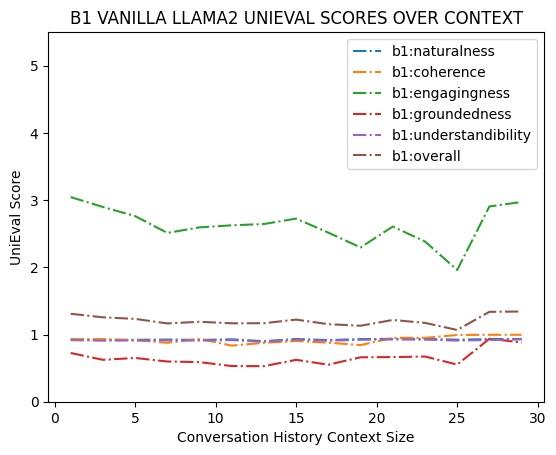

In [19]:
plt.plot([c[0] for c in collection], [c[2][0] for c in collection], '-.', label='b1:naturalness')
plt.plot([c[0] for c in collection], [c[2][1] for c in collection], '-.', label='b1:coherence')
plt.plot([c[0] for c in collection], [c[2][2] for c in collection], '-.', label='b1:engagingness')
plt.plot([c[0] for c in collection], [c[2][3] for c in collection], '-.', label='b1:groundedness')
plt.plot([c[0] for c in collection], [c[2][4] for c in collection], '-.', label='b1:understandibility')
plt.plot([c[0] for c in collection], [c[2][5] for c in collection], '-.', label='b1:overall')
plt.title('B1 VANILLA LLAMA2 UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 5.5)
plt.legend()
plt.show()

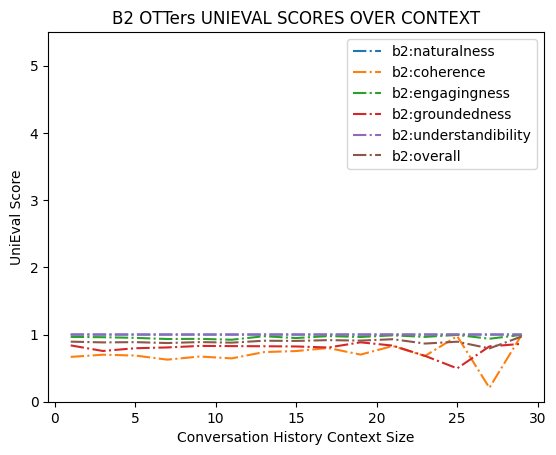

In [20]:
plt.plot([c[0] for c in collection], [c[3][0] for c in collection], '-.', label='b2:naturalness')
plt.plot([c[0] for c in collection], [c[3][1] for c in collection], '-.', label='b2:coherence')
plt.plot([c[0] for c in collection], [c[3][2] for c in collection], '-.', label='b2:engagingness')
plt.plot([c[0] for c in collection], [c[3][3] for c in collection], '-.', label='b2:groundedness')
plt.plot([c[0] for c in collection], [c[3][4] for c in collection], '-.', label='b2:understandibility')
plt.plot([c[0] for c in collection], [c[3][5] for c in collection], '-.', label='b2:overall')
plt.title('B2 OTTers UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 5.5)
plt.legend()
plt.show()

## QAE (MULTIWOZ)

In [21]:
questions_as_response_ours = []
questions_as_response_b1 = []
questions_as_response_b2 = []
total_instances = 0
for inst in ds_multiwoz:
    for i in ds_multiwoz[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        total_instances += 1
        if '?' in ours['generated']:
            questions_as_response_ours.append(i)
        if '?' in b1['generated']:
            questions_as_response_b1.append(i)
        if '?' in b2['generated']:
            questions_as_response_b2.append(i)

In [22]:
print(f'Ours: {len(questions_as_response_ours)}/{total_instances}')
print(f'B1: {len(questions_as_response_b1)}/{total_instances}')
print(f'B2: {len(questions_as_response_b2)}/{total_instances}')

Ours: 430/669
B1: 249/669
B2: 1/669


# Breaking UniEval

In [26]:
from UniEval.UniEval.utils import convert_to_json
from UniEval.UniEval.metric.evaluator import get_evaluator

/home/trevor/TR/topic-responder-venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
uni_evaluator = get_evaluator('dialogue')

In [31]:
response = 'Lorem Ipsum'
target = 'person2:I think I did hear something about that.  I imagine it is an attempt to psych the other team out.'
conv_history = [f'{target}\n']

In [32]:
data = convert_to_json(output_list=[response], 
                       src_list=conv_history, context_list=[''])
uval = uni_evaluator.evaluate(data, print_result=False)

Evaluating naturalness of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 12.79it/s]


Evaluating coherence of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 16.69it/s]


Evaluating engagingness of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 16.79it/s]


Evaluating groundedness of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 17.18it/s]


Evaluating understandability of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 15.56it/s]


In [33]:
print(uval)

[{'naturalness': 0.3084946630053238, 'coherence': 0.0036367660108235843, 'engagingness': 0.017020242055354805, 'groundedness': 0.024328954479118994, 'understandability': 0.31118877325796324, 'overall': 0.13293387976171686}]
